## Packages

In [1]:
import os
import re

import codecs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import squarify 

import urllib
import ast
from collections import Counter


## Barplot config

In [24]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

def show_values_on_bars_reg_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2 + 8))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_reg_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2+8,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load data set

In [2]:
pt_dict = []

with open("ptwiktionary-latest-pages-articles.xml", encoding="utf-8") as file:
    pt_dict = file.read()
print(len(pt_dict))

349113998


In [3]:
#pt_dict = urllib.parse.unquote(pt_dict)
regex = r"(?<=\<page\>)(.*?)\s*(?=\<\/page\>)"
pt_entries= re.findall(regex, pt_dict, re.DOTALL)

word_search = "===Portugal==="
pt_entries = [match for match in pt_entries if word_search in match]

word_search = "AFI"
pt_entries = [match for match in pt_entries if word_search in match]

pt_entries[0:3]

['\n    <title>excerto</title>\n    <ns>0</ns>\n    <id>625</id>\n    <revision>\n      <id>2645237</id>\n      <parentid>2346278</parentid>\n      <timestamp>2021-08-13T22:07:54Z</timestamp>\n      <contributor>\n        <username>Maykeinwiki</username>\n        <id>81160</id>\n      </contributor>\n      <comment>/* Substantivo */Trecho e excerto tem o mesmo significado [https://www.google.com/search?q=excerto&amp;oq=&amp;aqs=chrome.0.35i39i362l5...5.-1j0j7&amp;client=ms-android-motorola-rev2&amp;sourceid=chrome-mobile&amp;ie=UTF-8 excerto, por Oxford Languages]</comment>\n      <model>wikitext</model>\n      <format>text/x-wiki</format>\n      <text bytes="705" xml:space="preserve">={{-pt-}}=\n==Substantivo==\n{{flex.pt|ms=excerto|mp=excertos}}\n{{paroxítona|ex|cer|to}} {{gramática|m}}\n# [[extrato]], [[fragmento]] de um [[texto]]; [[trecho]]\n#: \'\'A seguir, um \'\'\'excerto\'\'\' do texto original.\'\'\n\n===Tradução===\n{{tradini}}\n* {{trad|es|extracto}}\n* {{trad|fr|extrait}}\

In [4]:
pt_entries_df = pd.DataFrame()

# IPA

In [5]:
regex = r"(===Portugal===\n.*).+"
pt_entries_IPA = [re.findall(regex, i, re.MULTILINE) for i in pt_entries]

pt_entries_IPA[0:10] 

[['===Portugal===\n* [[AFI]]: {{AFI|/ejʃˈseɾtu/|pt}}, {{AFI|/ejˈʃeɾtu/|pt}'],
 ['===Portugal===\n* AFI: {{AFI|/pɨ.ˈlu.ʃɨ/}'],
 ['===Portugal===\n* AFI: {{AFI|/kõ.tɾi.bwi.ˈsɐ̃w̃/}'],
 ['===Portugal===\n* AFI: {{AFI|/aɫ.ˈɡɐ̃j̃/}'],
 ['===Portugal===\n* AFI: {{AFI|/ˈkawʃ/}'],
 ['===Portugal===\n* AFI: {{AFI|/ˈaɫ.ɡu/}'],
 ['===Portugal===\n* AFI: {{AFI|/ɐ.nɐɾ.ˈki.ɐ/}'],
 ['===Portugal===\n* AFI: {{AFI|/sɨ.ˈlɐj.ɾu/}'],
 ['===Portugal===\n* AFI: {{AFI|/kɐ.ˈɾjɔ.kɐ/}'],
 ['===Portugal===\n* [[X-SAMPA]]: /&quot;g4a.tiZ']]

In [6]:
#pt_entries_IPA = [re.sub("\['===Portugal===", "", str(i)) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("']", "", str(i)) for i in pt_entries_IPA]
pt_entries_IPA = [str(i).split(':')[-1] for i in pt_entries_IPA]

pt_entries_IPA[0:10] 

[' {{AFI|/ejʃˈseɾtu/|pt}}, {{AFI|/ejˈʃeɾtu/|pt}',
 ' {{AFI|/pɨ.ˈlu.ʃɨ/}',
 ' {{AFI|/kõ.tɾi.bwi.ˈsɐ̃w̃/}',
 ' {{AFI|/aɫ.ˈɡɐ̃j̃/}',
 ' {{AFI|/ˈkawʃ/}',
 ' {{AFI|/ˈaɫ.ɡu/}',
 ' {{AFI|/ɐ.nɐɾ.ˈki.ɐ/}',
 ' {{AFI|/sɨ.ˈlɐj.ɾu/}',
 ' {{AFI|/kɐ.ˈɾjɔ.kɐ/}',
 ' /&quot;g4a.tiZ']

In [7]:
pt_entries_IPA = [re.sub("{{AFI\|\/", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("lang=pt", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("pt", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("[\/\|\'\}\{]", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub('"', "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("&quot;", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("&lt;", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("small&gt;", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("\[", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("\]", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("IPA", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub(" ", "", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("=.*", "", i) for i in pt_entries_IPA]

pt_entries_IPA = [i.split(',') for i in pt_entries_IPA]

pt_entries_IPA[0:10] 

[['ejʃˈseɾtu', 'ejˈʃeɾtu'],
 ['pɨ.ˈlu.ʃɨ'],
 ['kõ.tɾi.bwi.ˈsɐ̃w̃'],
 ['aɫ.ˈɡɐ̃j̃'],
 ['ˈkawʃ'],
 ['ˈaɫ.ɡu'],
 ['ɐ.nɐɾ.ˈki.ɐ'],
 ['sɨ.ˈlɐj.ɾu'],
 ['kɐ.ˈɾjɔ.kɐ'],
 ['g4a.tiZ']]

In [8]:
pt_entries_df["spelling"] = pt_entries_IPA

## Stats

In [9]:
pt_entries_IPA = [item for sublist in pt_entries_IPA for item in sublist]
pt_entries_IPA = [" ".join(list(str(i))) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("^", " ", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("$", " ", i) for i in pt_entries_IPA]
pt_entries_IPA

[' e j ʃ ˈ s e ɾ t u ',
 ' e j ˈ ʃ e ɾ t u ',
 ' p ɨ . ˈ l u . ʃ ɨ ',
 ' k õ . t ɾ i . b w i . ˈ s ɐ ̃ w ̃ ',
 ' a ɫ . ˈ ɡ ɐ ̃ j ̃ ',
 ' ˈ k a w ʃ ',
 ' ˈ a ɫ . ɡ u ',
 ' ɐ . n ɐ ɾ . ˈ k i . ɐ ',
 ' s ɨ . ˈ l ɐ j . ɾ u ',
 ' k ɐ . ˈ ɾ j ɔ . k ɐ ',
 ' g 4 a . t i Z ',
 ' ˈ l i . v ɾ ɨ ',
 ' ˌ w i k . s j u . ˈ n a . ɾ j u ',
 ' d i . s j u . ˈ n a . ɾ j u ',
 ' ɡ ɾ ɐ . ˈ n ɛ ɫ ',
 ' s ɔ f . ˈ t w ɛ ɾ ',
 ' ĩ . ˈ g l e ʃ ',
 ' p u ɾ . t u . ˈ ɡ e ʃ ',
 ' ʃ ɾ ɐ ̃ . ˈ s e ʃ ',
 ' i ʒ . l ɐ ̃ . ˈ d e ʃ ',
 ' i . t i . m u . l u . ˈ ʒ i . ɐ ',
 '  ',
 ' i ʒ . R ɐ . ɛ . ˈ l i . t ɐ ',
 ' ʒ u . ˈ d e w ',
 ' ˈ b ɛ ɫ . ɡ ɐ ',
 ' u . k ɾ ɐ . ˈ n j ɐ . n u ',
 ' ˈ t a ɾ . t ɐ . ɾ u ',
 ' ˈ l ĩ . ɡ w ɐ ',
 ' ũ ',
 ' ʒ ɐ . p u . ˈ n e ʃ ',
 ' n ĩ . ˈ ɡ ɐ ̃ j ̃ ',
 ' ˈ t u . d u ',
 ' ˈ e w ',
 ' ˈ e . l ɨ ',
 ' ˈ t ɛ . t ũ ',
 ' v j ɛ t . n ɐ . ˈ m i . t ɐ ',
 ' t ɾ i . p l i . ˈ k a ɾ ',
 ' k w ɐ . d ɾ u . p l i . ˈ k a ɾ ',
 ' k ĩ . t u . p l i . ˈ k a ɾ ',
 ' ɐ . t ɨ . ˈ n j ẽ . s ɨ ',
 ' a ɫ . 

In [10]:
word_list_split = [i.split(" ") for i in pt_entries_IPA]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
word_list_split

['e',
 'j',
 'ʃ',
 'ˈ',
 's',
 'e',
 'ɾ',
 't',
 'u',
 'e',
 'j',
 'ˈ',
 'ʃ',
 'e',
 'ɾ',
 't',
 'u',
 'p',
 'ɨ',
 '.',
 'ˈ',
 'l',
 'u',
 '.',
 'ʃ',
 'ɨ',
 'k',
 'õ',
 '.',
 't',
 'ɾ',
 'i',
 '.',
 'b',
 'w',
 'i',
 '.',
 'ˈ',
 's',
 'ɐ',
 '̃',
 'w',
 '̃',
 'a',
 'ɫ',
 '.',
 'ˈ',
 'ɡ',
 'ɐ',
 '̃',
 'j',
 '̃',
 'ˈ',
 'k',
 'a',
 'w',
 'ʃ',
 'ˈ',
 'a',
 'ɫ',
 '.',
 'ɡ',
 'u',
 'ɐ',
 '.',
 'n',
 'ɐ',
 'ɾ',
 '.',
 'ˈ',
 'k',
 'i',
 '.',
 'ɐ',
 's',
 'ɨ',
 '.',
 'ˈ',
 'l',
 'ɐ',
 'j',
 '.',
 'ɾ',
 'u',
 'k',
 'ɐ',
 '.',
 'ˈ',
 'ɾ',
 'j',
 'ɔ',
 '.',
 'k',
 'ɐ',
 'g',
 '4',
 'a',
 '.',
 't',
 'i',
 'Z',
 'ˈ',
 'l',
 'i',
 '.',
 'v',
 'ɾ',
 'ɨ',
 'ˌ',
 'w',
 'i',
 'k',
 '.',
 's',
 'j',
 'u',
 '.',
 'ˈ',
 'n',
 'a',
 '.',
 'ɾ',
 'j',
 'u',
 'd',
 'i',
 '.',
 's',
 'j',
 'u',
 '.',
 'ˈ',
 'n',
 'a',
 '.',
 'ɾ',
 'j',
 'u',
 'ɡ',
 'ɾ',
 'ɐ',
 '.',
 'ˈ',
 'n',
 'ɛ',
 'ɫ',
 's',
 'ɔ',
 'f',
 '.',
 'ˈ',
 't',
 'w',
 'ɛ',
 'ɾ',
 'ĩ',
 '.',
 'ˈ',
 'g',
 'l',
 'e',
 'ʃ',
 'p',
 'u',
 'ɾ',
 '.',
 't'

In [11]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["IPA", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,IPA,count
0,.,28654
1,ˈ,12318
2,ɐ,10374
3,ɾ,8130
4,u,7661
...,...,...
70,S,1
71,ŋ,1
72,Z,1
73,ô,1


In [12]:
IPA_list = list(df["IPA"])
in_word_list = []
for word in IPA_list:
    word_search = " "+ word + " "
    matches = len([match for match in pt_entries_IPA if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df

,IPA,count,word_count
0,.,28654,12138
1,ˈ,12318,12313
2,ɐ,10374,7254
3,ɾ,8130,6715
4,u,7661,6191
...,...,...,...
70,S,1,1
71,ŋ,1,1
72,Z,1,1
73,ô,1,1


In [13]:
df.to_csv("wikcionario.csv", index = False, header = True)

# Spelling

In [14]:
regex = r"(?<=\<title\>)(.*)(?=\<\/title\>)"
pt_entries_ort = [re.findall(regex, i)[0] for i in pt_entries]
pt_entries_ort[0:10] 

['excerto',
 'peluche',
 'contribuição',
 'alguém',
 'caos',
 'algo',
 'anarquia',
 'celeiro',
 'carioca',
 'grátis']

In [15]:
pt_entries_df["word"] = pt_entries_ort

## Words with [p] , [m] , [lh] and [nh]

In [16]:
word_df = pt_entries_df
p_m_nh_lh_dipth_stats_list = []
p_m_nh_lh_dipth_stats_list.append(["word_all",len(word_df)])
print("total unique words: " + str(len(word_df)))

total unique words: 12374


In [17]:
word_p = word_df[word_df["word"].str.contains("p")]
p_m_nh_lh_dipth_stats_list.append(["word_p",len(word_p)])
word_p

,spelling,word
1,[pɨ.ˈlu.ʃɨ],peluche
16,[puɾ.tu.ˈɡeʃ],português
28,[ʒɐ.pu.ˈneʃ],japonês
35,[tɾi.pli.ˈkaɾ],triplicar
36,[kwɐ.dɾu.pli.ˈkaɾ],quadruplicar
...,...,...
12360,[iʃ.pɐ.Ri.ˈɲaɾ],esparrinhar
12362,[puɾ.ˈtẽ.tu],portento
12369,[ku.ˈpjɔ.zus],copiosos
12370,[ku.ˈpjɔ.zas],copiosas


In [18]:
m_list = "m[aáàâãeéèêiíìoóòôõuúù]"
word_m = word_df[word_df["word"].str.contains(m_list)]
p_m_nh_lh_dipth_stats_list.append(["word_m",len(word_m)])
word_m

,spelling,word
19,[i.ti.mu.lu.ˈʒi.ɐ],etimologia
34,[vjɛt.nɐ.ˈmi.tɐ],vietnamita
42,[ˈɛ.ti.mu],étimo
44,[ɔ.ˈmɔ.lu.ɡu],homólogo
45,[mɨ.djɛ.ˈvaɫ],medieval
...,...,...
12348,[ɐ.ɡɾɐ.vɐ.ˈmẽ.tu],agravamento
12350,[i.mu.dɨ.ˈɾa.du],imoderado
12354,[pɾje.mi.ˈnẽ.sjɐ],preeminência
12361,[muʃ.kɐ.ˈtɛɫ],moscatel


In [19]:
word_lh = word_df[word_df["word"].str.contains("lh")]
p_m_nh_lh_dipth_stats_list.append(["word_lh",len(word_lh)])
word_lh

,spelling,word
79,[kɐʃ.tɨ.ˈʎɐ.nu],castelhano
165,[ẽ.pɨ.ˈsi.ʎu],empecilho
190,[vɨɾ.ˈmɐj.ʎu],vermelho
202,[ɔɾ.ɡu.ˈʎo.zu],orgulhoso
294,[eɾ.ˈvi.ʎɐ],ervilha
...,...,...
12279,[iʃ.pɐɾ.ˈti.ʎu],espartilho
12322,[ɐ.tɐ.bɐ.ʎwɐ.ˈmẽ.tu],atabalhoamento
12325,[ʃu.kɐ.ˈʎaɾ],chocalhar
12358,[ẽ.ʒɨ.ˈʎa.du],engelhado


In [20]:
word_nh = word_df[word_df["word"].str.contains("nh")]
p_m_nh_lh_dipth_stats_list.append(["word_nh",len(word_nh)])
word_nh

,spelling,word
56,[ɐ.ˈbɾu.ɲu],abrunho
117,[kɐ.ˈɲɐ̃w̃],canhão
212,[su.ˈɲaɾ],sonhar
239,[kɐʃ.ˈtɐ.ɲɐ],castanha
414,[ẽ.di.ɲɐj.ˈɾa.du],endinheirado
...,...,...
12175,[ɡɐ.ɲɐ.ˈdoɾ],ganhador
12190,[kɔ.ˈvi.ɲɐ],covinha
12212,[ko.mɨ.ˈzi.ɲu],comezinho
12336,[fɐ.ɾi.ˈɲẽ.tu],farinhento


In [21]:
p_m_nh_lh_dipth_stats = pd.DataFrame(p_m_nh_lh_dipth_stats_list, columns=["item","length"])
p_m_nh_lh_dipth_stats

,item,length
0,word_all,12374
1,word_p,2400
2,word_m,2364
3,word_lh,300
4,word_nh,207


In [22]:
max_total_words_length = p_m_nh_lh_dipth_stats["length"].max()

p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"]/max_total_words_length
p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"].round(5)
p_m_nh_lh_dipth_stats.drop(index=p_m_nh_lh_dipth_stats.index[0], axis=0, inplace=True)
p_m_nh_lh_dipth_stats

,item,length
1,word_p,0.19396
2,word_m,0.19105
3,word_lh,0.02424
4,word_nh,0.01673


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

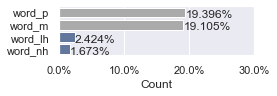

In [25]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(3.5, 0.9)
ax.set(xlabel="Count", ylabel="")

In [26]:
writer = pd.ExcelWriter("word_IPA_wikcionario_lh_nh.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_lh.to_excel(writer, index=False, sheet_name='word_lh')
word_nh.to_excel(writer, index=False, sheet_name='word_nh')

writer.save()

## Free diphtong words

In [27]:
dipht_free_ai = word_df[word_df["word"].str.contains("ai")]
dipht_free_ei = word_df[word_df["word"].str.contains("ei|éi")]
dipht_free_oi = word_df[word_df["word"].str.contains("oi|ói")]
dipht_free_ui = word_df[word_df["word"].str.contains("ui")]
dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("gui|qui")]

In [28]:
writer = pd.ExcelWriter("word_IPA_wikcionario_dipht_free.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

dipht_free_ai.to_excel(writer, index=False, sheet_name='dipht_free_ai')
dipht_free_ei.to_excel(writer, index=False, sheet_name='dipht_free_ei')
dipht_free_oi.to_excel(writer, index=False, sheet_name='dipht_free_oi')
dipht_free_ui.to_excel(writer, index=False, sheet_name='dipht_free_ui')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_free.xlsx file copy sheets.

In [42]:
dipht_free_list = []
dipht_free_ai = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ai")
dipht_free_ai = dipht_free_ai[dipht_free_ai["Syllabifier"].str.contains("ai•|ai$")]
dipht_free_ai = len(dipht_free_ai)

dipht_free_ei = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ei")
dipht_free_ei = dipht_free_ei[dipht_free_ei["Syllabifier"].str.contains("ei•|ei$")]
dipht_free_ei = len(dipht_free_ei)

dipht_free_oi = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_oi")
dipht_free_oi = dipht_free_oi[dipht_free_oi["Syllabifier"].str.contains("oi•|oi$")]

dipht_free_ou_or_oi = dipht_free_oi.copy()
dipht_free_ou_or_oi["word"] = dipht_free_oi["word"].replace(to_replace=r'oi', value='ou', regex=True)
dipht_free_ou = word_df[word_df["word"].str.contains("ou")]
dipht_free_ou_or_oi = dipht_free_ou_or_oi[["word","Syllabifier"]]
dipht_free_ou_or_oi = pd.merge(dipht_free_ou, dipht_free_ou_or_oi, how = "inner", indicator = False)
dipht_free_ou_or_oi = len(dipht_free_ou_or_oi)
dipht_free_oi = len(dipht_free_oi)

dipht_free_ui = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ui")
dipht_free_ui = dipht_free_ui[dipht_free_ui["Syllabifier"].str.contains("ui•|ui$")]
#dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("uim$|uir$")]
dipht_free_ui = len(dipht_free_ui)

dipht_free_list.append(["dipht_free_ai",dipht_free_ai])
dipht_free_list.append(["dipht_free_ei",dipht_free_ei])
dipht_free_list.append(["dipht_free_oi",dipht_free_oi])
dipht_free_list.append(["dipht_free_ou_or_oi",dipht_free_ou_or_oi])
dipht_free_list.append(["dipht_free_ui",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["item","length"])
dipht_free_df

,item,length
0,dipht_free_ai,111
1,dipht_free_ei,443
2,dipht_free_oi,52
3,dipht_free_ou_or_oi,4
4,dipht_free_ui,21


In [43]:
dipht_free_df["length"] = dipht_free_df["length"]/max_total_words_length
dipht_free_df["length"] = dipht_free_df["length"].round(5)
dipht_free_df

,item,length
0,dipht_free_ai,0.00897
1,dipht_free_ei,0.03580
2,dipht_free_oi,0.00420
3,dipht_free_ou_or_oi,0.00032
4,dipht_free_ui,0.00170


In [44]:
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.append(dipht_free_df)
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.reset_index(drop=True)
p_m_nh_lh_dipth_stats

,item,length
0,word_p,0.19396
1,word_m,0.19105
2,word_lh,0.02424
3,word_nh,0.01673
4,dipht_free_ai,0.00897
5,dipht_free_ei,0.03580
6,dipht_free_oi,0.00420
7,dipht_free_ou_or_oi,0.00032
8,dipht_free_ui,0.00170


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

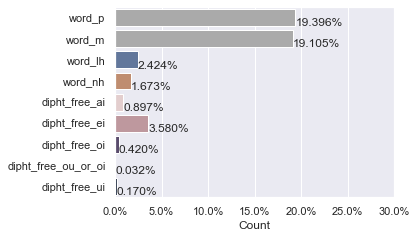

In [45]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_nh': '#cc8963',
    'diph_free_ai': '#e6cbcb',
    'diph_free_ei': '#c49299',
    #'i': '#9f8097',
    'diph_free_oi': '#594772',
    'diph_free_oi_or_ui': '#594772',
    'diph_free_ui': '#21314e'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))
 
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item", data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 3.5)
ax.set(xlabel="Count", ylabel="")

## [lh] and [nh]

### vowels

In [46]:
dipht_free_list = []
dipht_free_list.append(["a","_i",dipht_free_ai])
dipht_free_list.append(["e","_i",dipht_free_ei])
dipht_free_list.append(["i","_i",0])
dipht_free_list.append(["o","_i",dipht_free_oi])
dipht_free_list.append(["u","_i",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["vowel","item","length"])
dipht_free_df

,vowel,item,length
0,a,_i,111
1,e,_i,443
2,i,_i,0
3,o,_i,52
4,u,_i,21


In [47]:
palatal_vowel_list = []

left_a_lh = word_df[word_df["word"].str.contains("alh|álh|àlh|âlh")]
palatal_vowel_list.append(["a","_lh",len(left_a_lh)])
left_e_lh = word_df[word_df["word"].str.contains("elh|élh|èlh|êlh")]
palatal_vowel_list.append(["e","_lh",len(left_e_lh)])
left_i_lh = word_df[word_df["word"].str.contains("ilh|ílh|ìlh")]
palatal_vowel_list.append(["i","_lh",len(left_i_lh)])
left_o_lh = word_df[word_df["word"].str.contains("olh|ólh|òlh|ôlh")]
palatal_vowel_list.append(["o","_lh",len(left_o_lh)])
left_u_lh = word_df[word_df["word"].str.contains("ulh|úlh|ùlh")]
palatal_vowel_list.append(["u","_lh",len(left_u_lh)])

left_a_nh = word_df[word_df["word"].str.contains("anh|ánh|ành|ânh")]
palatal_vowel_list.append(["a","_nh",len(left_a_nh)])
left_e_nh = word_df[word_df["word"].str.contains("enh|énh|ènh|ênh")]
palatal_vowel_list.append(["e","_nh",len(left_e_nh)])
left_i_nh = word_df[word_df["word"].str.contains("inh|ính|ình")]
palatal_vowel_list.append(["i","_nh",len(left_i_nh)])
left_o_nh = word_df[word_df["word"].str.contains("onh|ónh|ònh|ônh")]
palatal_vowel_list.append(["o","_nh",len(left_o_nh)])
left_u_nh = word_df[word_df["word"].str.contains("unh|únh|ùnh")]
palatal_vowel_list.append(["u","_nh",len(left_u_nh)])

palatal_vowel_df = pd.DataFrame(palatal_vowel_list, columns=["vowel","item","length"])

palatal_vowel_df

,vowel,item,length
0,a,_lh,106
1,e,_lh,49
2,i,_lh,86
3,o,_lh,27
4,u,_lh,31
5,a,_nh,56
6,e,_nh,23
7,i,_nh,92
8,o,_nh,18
9,u,_nh,18


In [48]:
vowel_combo_df = pd.concat([dipht_free_df, palatal_vowel_df], axis= 0)
vowel_combo_df

,vowel,item,length
0,a,_i,111
1,e,_i,443
2,i,_i,0
3,o,_i,52
4,u,_i,21
0,a,_lh,106
1,e,_lh,49
2,i,_lh,86
3,o,_lh,27
4,u,_lh,31


In [49]:
df_count = vowel_combo_df.groupby(['vowel','item']).sum().unstack()
df_count

length         
item      _i  _lh _nh
vowel                
a        111  106  56
e        443   49  23
i          0   86  92
o         52   27  18
u         21   31  18

In [50]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df

length                      
item          _i        _lh        _nh
vowel                                 
a      17.703349  35.451505  27.053140
e      70.653907  16.387960  11.111111
i       0.000000  28.762542  44.444444
o       8.293461   9.030100   8.695652
u       3.349282  10.367893   8.695652

[Text(0, 0, '_i'), Text(1, 0, '_lh'), Text(2, 0, '_nh')]

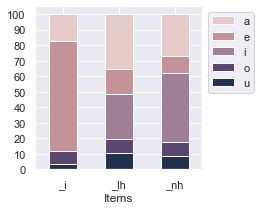

In [51]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(3,3), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['length']),rotation=0)

In [52]:
palatal_vowel_df

,vowel,item,length
0,a,_lh,106
1,e,_lh,49
2,i,_lh,86
3,o,_lh,27
4,u,_lh,31
5,a,_nh,56
6,e,_nh,23
7,i,_nh,92
8,o,_nh,18
9,u,_nh,18


In [53]:
palatal_vowel_df["length"] = palatal_vowel_df["length"]/max_total_words_length
palatal_vowel_df["length"] = palatal_vowel_df["length"].round(5)
palatal_vowel_df

,vowel,item,length
0,a,_lh,0.00857
1,e,_lh,0.00396
2,i,_lh,0.00695
3,o,_lh,0.00218
4,u,_lh,0.00251
5,a,_nh,0.00453
6,e,_nh,0.00186
7,i,_nh,0.00743
8,o,_nh,0.00145
9,u,_nh,0.00145


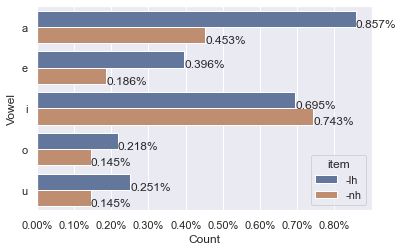

In [54]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()
ax.set(xlabel="Count", ylabel="Vowel")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,3.75)

### contiguous left 

In [55]:
constiguous_left_list = []

dipht_lh = "ailh|iulh|uilh|eulh|éulh|eilh|éilh|oilh|óilh|aulh|oulh"
dipht_nh = "ainh|iunh|uinh|eunh|éunh|einh|éinh|oinh|óinh|aunh|ounh"
nasal_vowel_lh = "nlh|nnh|ãlh"
nasal_vowel_nh = "ãnh|õlh|õnh"

left_nasal_vowel_lh = word_df[word_df["word"].str.contains(nasal_vowel_lh)]
constiguous_left_list.append(["left_nasal_vowel_lh",len(left_nasal_vowel_lh)])
left_dipht_lh = word_df[word_df["word"].str.contains(dipht_lh)]
left_dipht_lh = left_dipht_lh[~left_dipht_lh["word"].str.contains("guilh|quilh|guelh|quelh")]
constiguous_left_list.append(["left_dipht_lh",len(left_dipht_lh)])
left_rot_lh = word_df[word_df["word"].str.contains("rlh")]
constiguous_left_list.append(["left_rot_lh",len(left_rot_lh)])
left_lat_lh = word_df[word_df["word"].str.contains("llh")]
constiguous_left_list.append(["left_lat_lh",len(left_lat_lh)])


left_nasal_vowel_nh = word_df[word_df["word"].str.contains(nasal_vowel_nh)]
constiguous_left_list.append(["left_nasal_vowel_nh",len(left_nasal_vowel_nh)])
left_dipht_nh = word_df[word_df["word"].str.contains(dipht_nh)]
#print(left_dipht_nh)
left_dipht_nh = left_dipht_nh[~left_dipht_nh["word"].str.contains("guinh|quinh|guenh|quenh")]
constiguous_left_list.append(["left_dipht_nh",len(left_dipht_nh)])
left_rot_nh = word_df[word_df["word"].str.contains("rnh")]
constiguous_left_list.append(["left_rot_nh",len(left_rot_nh)])
left_lat_nh = word_df[word_df["word"].str.contains("lnh")]
constiguous_left_list.append(["left_lat_nh",len(left_lat_nh)])

constiguous_left_df = pd.DataFrame(constiguous_left_list, columns=["item","length"])
constiguous_left_df

,item,length
0,left_nasal_vowel_lh,0
1,left_dipht_lh,0
2,left_rot_lh,0
3,left_lat_lh,0
4,left_nasal_vowel_nh,0
5,left_dipht_nh,8
6,left_rot_nh,0
7,left_lat_nh,0


In [56]:
writer = pd.ExcelWriter("word_IPA_wikcionario_dipht_left_palatal.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

left_dipht_lh.to_excel(writer, index=False, sheet_name='left_dipht_lh')
left_dipht_nh.to_excel(writer, index=False, sheet_name='left_dipht_nh')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_left_palatal.xlsx file copy sheets. Phonological notes column is human corrected.

In [57]:
left_dipht_lh = pd.read_excel("word_dicio_wikcionario_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_lh")
left_dipht_lh = len(left_dipht_lh[left_dipht_lh["Syllabifier"].str.contains("ai•lh|ei•lh|oi•lh|ui•lh")])
left_dipht_nh = pd.read_excel("word_dicio_wikcionario_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_nh")
left_dipht_nh = len(left_dipht_nh[left_dipht_nh["Syllabifier"].str.contains("ai•nh|ei•nh|oi•nh|ui•nh")])
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_lh', 'length'] = left_dipht_lh
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_nh', 'length'] = left_dipht_nh
constiguous_left_df

FileNotFoundError: [Errno 2] No such file or directory: 'word_dicio_wikcionario_left_palatal_with_syllabification.xlsx'

In [ ]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = list(np.repeat(all_colors,4))
sns.set_palette(sns.color_palette(all_colors))


fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=constiguous_left_df)
show_values_on_bars_h(ax)
fig.set_size_inches(7,3)
ax.set(xlabel="Count", ylabel="")
plt.xlim(0, 9)

### position

In [58]:
initial_lh = word_df[word_df["word"].str.contains("^lh")]
#initial_lh = len(initial_lh)
initial_nh = word_df[word_df["word"].str.contains("^nh")]
#initial_nh = len(initial_nh)

In [59]:
initial_lh

,spelling,word
1307,[ʎɨ],lhe


In [60]:
initial_nh

,spelling,word


In [61]:
initial_list = []

initial_lh = len(initial_lh)
initial_nh = len(initial_nh)

initial_list.append(["initial_lh",initial_lh])
initial_list.append(["initial_nh",initial_nh])


df_initial = pd.DataFrame(initial_list, columns=["item","length"])
df_initial

,item,length
0,initial_lh,1
1,initial_nh,0
